In [1]:
import transformers 

e:\TEXT\TTTT\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


In [5]:
transformers.__version__

'4.36.2'

In [3]:
%pip install langchain

Note: you may need to restart the kernel to use updated packages.


In [4]:
%pip install FAISS

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement FAISS (from versions: none)
ERROR: No matching distribution found for FAISS


In [ ]:
import transformers

In [6]:
%pip install scikit-learn


  Using cached scikit_learn-1.3.2-cp310-cp310-win_amd64.whl.metadata (11 kB)
  Using cached scipy-1.11.4-cp310-cp310-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.3.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.2.0-py3-none-any.whl.metadata (10.0 kB)
Using cached scikit_learn-1.3.2-cp310-cp310-win_amd64.whl (9.3 MB)
Using cached joblib-1.3.2-py3-none-any.whl (302 kB)
Using cached scipy-1.11.4-cp310-cp310-win_amd64.whl (44.1 MB)
Using cached threadpoolctl-3.2.0-py3-none-any.whl (15 kB)


In [8]:
from sklearn.feature_extraction.text import CountVectorizer


In [17]:
import pandas as pd 
import numpy as np 

In [9]:
x = ['which book is this','this is book and this is math']

In [11]:
#create countvectorizer object
cv = CountVectorizer()

In [12]:
count = cv.fit_transform(x)

In [19]:
count.toarray() # This are bag of words 

array([[0, 1, 1, 0, 1, 1],
       [1, 1, 2, 1, 2, 0]], dtype=int64)

In [16]:
cv.get_feature_names_out()

array(['and', 'book', 'is', 'math', 'this', 'which'], dtype=object)

In [20]:
bow = pd.DataFrame(count.toarray(),columns = cv.get_feature_names_out())

In [21]:
bow

,and,book,is,math,this,which
0,0,1,1,0,1,1
1,1,1,2,1,2,0


Calculate TFIDF

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [24]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(x)

In [25]:
x

['which book is this', 'this is book and this is math']

In [26]:
print(X.toarray())

[[0.         0.44832087 0.44832087 0.         0.44832087 0.63009934]
 [0.39054766 0.27787788 0.55575576 0.39054766 0.55575576 0.        ]]


In [27]:
tfidf.idf_

array([1.40546511, 1.        , 1.        , 1.40546511, 1.        ,
       1.40546511])

In [32]:
#Load Spam Dataset
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
df= pd.read_csv('spam.tsv',sep ='\t')

In [35]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [36]:

df['label'].value_counts()
# this is unbalance dataset . uaing unbalance dataset recall ,precision and accuracy willnot give good result 

label
ham     4825
spam     747
Name: count, dtype: int64

In [38]:
# make dataset balance 
ham = df[df['label']=='ham']
ham.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
6,ham,Even my brother is not like to speak with me. ...,77,2


In [39]:
spam = df[df['label']=='spam']
spam.head()

,label,message,length,punct
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
8,spam,WINNER!! As a valued network customer you have...,157,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136,8


In [40]:
ham.shape ,spam.shape

((4825, 4), (747, 4))

In [44]:
ham = ham.sample(spam.shape[0])

In [42]:
ham.shape ,spam.shape

((747, 4), (747, 4))

In [45]:
data = ham.append(spam,ignore_index= True)

AttributeError: 'DataFrame' object has no attribute 'append'

In [46]:
ham

,label,message,length,punct
3165,ham,TODAY is Sorry day.! If ever i was angry with ...,148,7
2076,ham,Must come later.. I normally bathe him in da a...,60,4
2105,ham,Anyway seriously hit me up when you're back be...,134,2
5249,ham,"K I'm leaving soon, be there a little after 9",45,2
3815,ham,Can. Dunno wat to get 4 her...,30,4
...,...,...,...,...
5193,ham,"It's wylie, you in tampa or sarasota?",37,3
484,ham,Thank you baby! I cant wait to taste the real ...,54,4
918,ham,"When people see my msgs, They think Iam addict...",148,11
5013,ham,U attend ur driving lesson how many times a wk...,59,1


In [47]:
spam

,label,message,length,punct
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
8,spam,WINNER!! As a valued network customer you have...,157,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136,8
...,...,...,...,...
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
5540,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
5547,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
5566,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3


In [48]:
data = pd.concat([ham, spam], ignore_index=True)

In [49]:
data

,label,message,length,punct
0,ham,TODAY is Sorry day.! If ever i was angry with ...,148,7
1,ham,Must come later.. I normally bathe him in da a...,60,4
2,ham,Anyway seriously hit me up when you're back be...,134,2
3,ham,"K I'm leaving soon, be there a little after 9",45,2
4,ham,Can. Dunno wat to get 4 her...,30,4
...,...,...,...,...
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3


In [50]:
data.sample(10)

,label,message,length,punct
1357,spam,"I want some cock! My hubby's away, I need a re...",162,11
879,spam,Congratulations ur awarded either a yrs supply...,160,4
1283,spam,Please call our customer service representativ...,147,2
1189,spam,This message is free. Welcome to the new & imp...,134,6
632,ham,I surely dont forgot to come:)i will always be...,70,5
593,ham,Hey i will be late ah... Meet you at 945+,41,4
256,ham,Whos this am in class:-),24,3
964,spam,Thanks for the Vote. Now sing along with the s...,121,3
399,ham,"Alright we're hooked up, where you guys at",42,2
575,ham,Then u drive lor.,17,1


In [51]:
data['label'].value_counts()

label
ham     747
spam    747
Name: count, dtype: int64

In [52]:
#EDA 
data

,label,message,length,punct
0,ham,TODAY is Sorry day.! If ever i was angry with ...,148,7
1,ham,Must come later.. I normally bathe him in da a...,60,4
2,ham,Anyway seriously hit me up when you're back be...,134,2
3,ham,"K I'm leaving soon, be there a little after 9",45,2
4,ham,Can. Dunno wat to get 4 her...,30,4
...,...,...,...,...
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3


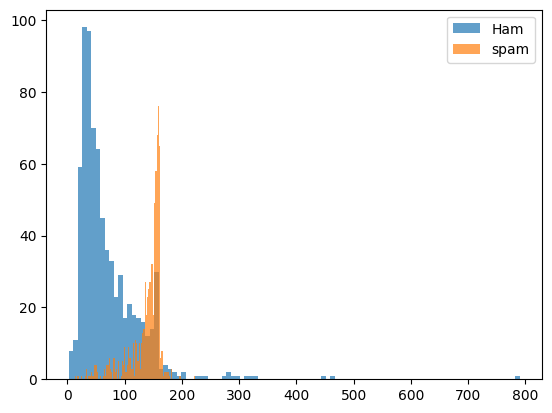

In [57]:
plt.hist(ham['length'],bins = 100 ,alpha =.7,label ='Ham')
plt.hist(spam['length'],bins = 100 ,alpha =.7,label = 'spam')
plt.legend()
plt.show()

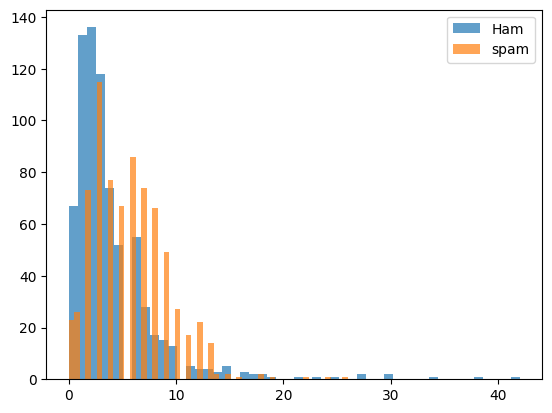

In [59]:
plt.hist(ham['punct'],bins = 50 ,alpha =.7,label ='Ham')
plt.hist(spam['punct'],bins = 50 ,alpha =.7,label = 'spam')
plt.legend()
plt.show()
# punctuation is not a good intdicator for which message is spam or ham 

In [61]:
#Data preparation for training 

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.pipeline import Pipeline

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [62]:
data.head()

,label,message,length,punct
0,ham,TODAY is Sorry day.! If ever i was angry with ...,148,7
1,ham,Must come later.. I normally bathe him in da a...,60,4
2,ham,Anyway seriously hit me up when you're back be...,134,2
3,ham,"K I'm leaving soon, be there a little after 9",45,2
4,ham,Can. Dunno wat to get 4 her...,30,4


In [63]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(data['message'])

In [64]:
X = X.toarray()

In [66]:
X.shape

(1494, 4535)

In [68]:
X   # -----Here X is mostly a sparse matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [70]:
X_train ,X_test,y_train,y_test = train_test_split(X,data['label'],test_size = 0.2 , random_state =0,stratify = data['label'])

In [ ]:
#build and train SVM and Random Forest Model 


In [71]:
#Training My First Text CLassifier

clf = RandomForestClassifier(n_estimators=100, n_jobs = -1)

In [72]:
clf.fit(X_train,y_train)

RandomForestClassifier(n_jobs=-1)

In [73]:
y_pred  = clf.predict(X_test)

In [74]:
confusion_matrix(y_test , y_pred)

array([[150,   0],
       [ 14, 135]], dtype=int64)

In [76]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.91      1.00      0.96       150
        spam       1.00      0.91      0.95       149

    accuracy                           0.95       299
   macro avg       0.96      0.95      0.95       299
weighted avg       0.96      0.95      0.95       299



In [83]:
#For SVC 
clf = SVC(C = 1000, gamma = 'auto')

In [84]:
clf.fit(X_train,y_train)

SVC(C=1000, gamma='auto')

In [85]:
y_pred  = clf.predict(X_test)

In [86]:
confusion_matrix(y_test , y_pred)

array([[147,   3],
       [ 19, 130]], dtype=int64)

In [87]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.89      0.98      0.93       150
        spam       0.98      0.87      0.92       149

    accuracy                           0.93       299
   macro avg       0.93      0.93      0.93       299
weighted avg       0.93      0.93      0.93       299



Test Model With Real Data 

In [88]:
clf

SVC(C=1000, gamma='auto')

In [92]:
def predict(x):
    x = tfidf.transform([x])
    x= x.toarray()
    pred = clf.predict(x)
    return pred

In [96]:
predict('hey,whassup,good morning')

array(['ham'], dtype=object)

In [95]:
predict('You Have got free tickets to the Canada this summer ')

array(['spam'], dtype=object)